In [1]:
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
import numpy as np
import cv2

In [2]:
dimension_x, dimension_y = 8, 4
desfase_x, desfase_y = 0, 0 # se elige a ojo. Se podría usar si los bordes están mal.
ancho_img, alto_img = 0, 0

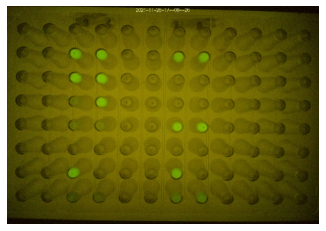

(477, 684, 3)
(210, 450, 3)


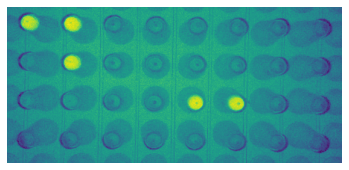

In [3]:
img = io.imread('img_44.PNG')
img_gris = io.imread('img_44.PNG', as_gray=True)
#img = cv2.imread('img_44.PNG', cv2.IMREAD_COLOR)
#img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.axis('off') 
plt.show()
print(img.shape) # tiene 3 canales, parece ser RGB

img = img[135:345, 120:570, :] # imagen croppeada
print(img.shape)
plt.imshow(img[:,:,1])
plt.axis('off') 
plt.show()

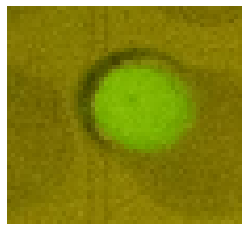

In [30]:
alto_img = img.shape[0]
ancho_img = img.shape[1]
ancho_celda = ancho_img / dimension_x # ignorando desfase
alto_celda = alto_img / dimension_y

def get_celda(img, i, j): # fila, columna (empieza en 1)
    if len(img.shape) == 3:
        new_img = img[int(alto_celda*(i-1))+desfase_y:int(alto_celda*i)+desfase_y, int(ancho_celda*(j-1)):int(ancho_celda*j), :]
    elif len(img.shape) == 2:
        new_img = img[int(alto_celda*(i-1))+desfase_y:int(alto_celda*i)+desfase_y, int(ancho_celda*(j-1)):int(ancho_celda*j)]        
    return new_img

test = get_celda(img, 1, 2)
#print(test.shape) # tiene 3 canales, parece ser RGB
plt.imshow(test)
plt.axis('off') 
plt.show()

In [42]:
def get_circle(imagen, param1=100, param2=8, minRadius=10, maxRadius=16, imprimir=False):
    
    imagen = imagen.copy()
    imagen = img_as_ubyte(imagen)
    # se hacen copias para no alterar las imagenes
    
    circulos = cv2.HoughCircles(imagen, cv2.HOUGH_GRADIENT, 1, 20, 
                                param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    #print(circulos)
    # Si se detectan círculos...
    if circulos is not None:
        circulos = np.uint16(np.around(circulos))
        for i in circulos[0, :]:
            print(i)
            # Dibujar el círculo y su centro
            cv2.circle(imagen, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(imagen, (i[0], i[1]), 2, (0, 0, 255), 3)

    if imprimir:
        plt.imshow(imagen)
        plt.show()
    return circulos[0,0]

def plot(img):
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

In [72]:
celdas_seleccionadas = '' # variable que con la infomración de cada celda # {(i1,j1): [circulo, []], (i2,j2): [], ...]
data = '' # variable que representa el set de imagenes

                        
def calcular_intensidad_promedio(img, circulo):
    i, j, r = circulo
    segmento = img[j-r:j+r, i-r:i+r]
    plot(segmento)
    #segmento = img[j-r:j+r, i-r:i+r, 1]
    #plot(segmento)
    return np.mean(segmento) # canal G
    
def main():
    
    img = io.imread('img_44.PNG')
    img = img[135:345, 120:570, :] # imagen croppeada
    img_gris = io.imread('img_44.PNG', as_gray=True)
    img_gris= img_gris[135:345, 120:570] # imagen croppeada
    data = [img, img]
    celdas_seleccionadas = {(1,1):[None,[]], (1,2):[None,[]]}
    
    # pedir al usuario las celdas seleccionadas
    
    # imagen inicial para detectar celdas

    
    # para cada celda seleccionada, encontrar el circulo correspondiente
    for celda in celdas_seleccionadas.keys():
        i, j = celda
        img_celda = get_celda(img_gris, i, j)
        #plot(img_celda)
        #print(img_celda.shape)
        circulo = get_circle(img_celda, imprimir=False)
        # se reescalan las coordenadas
        #circulo = (circulo[0]+j, circulo[1]+i, circulo[2])
        celdas_seleccionadas[celda][0] = circulo
    print(celdas_seleccionadas)
    
    # proceso respecto al t
    for t, im in enumerate(data):
        # estoy en una imagen especifica en un determinado t
        for celda in celdas_seleccionadas.keys():
            # obtener los valores de la imagen consultando el circulo
            circulo = celdas_seleccionadas[celda][0]
            i, j = celda
            img_celda = get_celda(im, i, j)
            valor = calcular_intensidad_promedio(img_celda, circulo)
            celdas_seleccionadas[celda][1].append(valor)
    print(celdas_seleccionadas)

# TODO: garantizar una sola detección en get_circle
# TODO: intensidad en solo canal verde?

[28 22 13]
[30 22 13]
{(1, 1): [array([28, 22, 13], dtype=uint16), []], (1, 2): [array([30, 22, 13], dtype=uint16), []]}


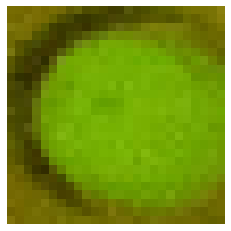

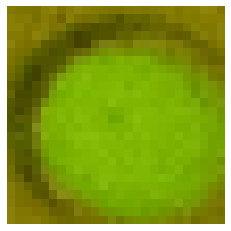

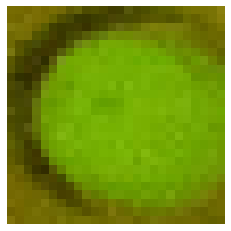

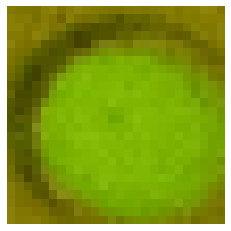

{(1, 1): [array([28, 22, 13], dtype=uint16), [80.6060157790927, 80.6060157790927]], (1, 2): [array([30, 22, 13], dtype=uint16), [87.7361932938856, 87.7361932938856]]}


In [73]:
main()